In [ ]:
To address our analysis, we need to respond to the subsequent inquiries:

Do a greater number of restaurants provide online delivery as opposed to offline services?
Which types of restaurants are the most favored by the general public?
What price range is preferred by couples for their dinner at restaurants?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv("/Users/Admin/Downloads/Zomato data .csv")
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [9]:
def handlerate(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)

df['rate']=df['rate'].apply(handlerate)
print(df.head())


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [10]:
#getting summary of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'type of restaurant')

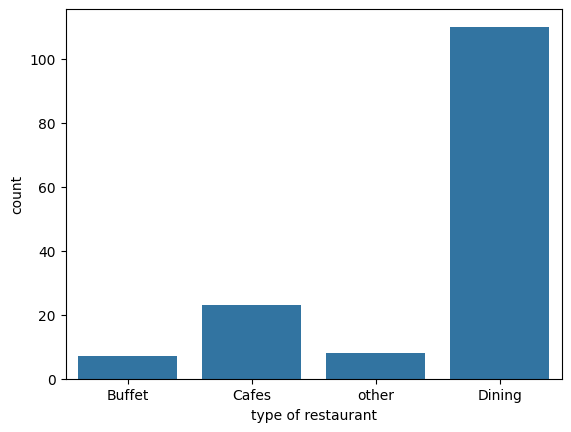

In [11]:
#lets explore listed_in column
sns.countplot(x=df['listed_in(type)'])
plt.xlabel('type of restaurant')

Text(0, 0.5, 'votes')

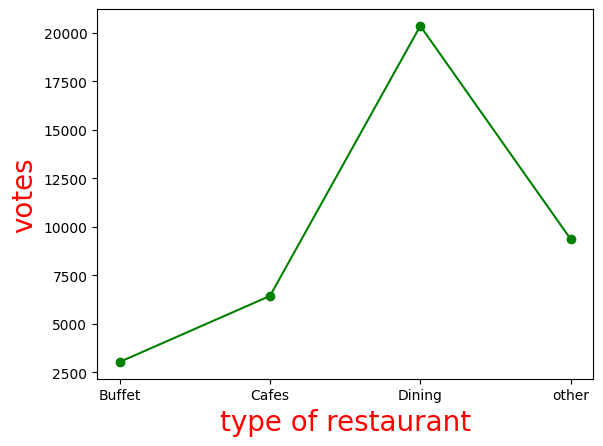

In [12]:
grouped_data=df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped_data})
plt.plot(result,c='green',marker='o')
plt.xlabel('type of restaurant',c='red',size=20)
plt.ylabel('votes',c='red',size=20)


In [13]:
#we will determine the restaurant’s name that received the maximum votes based on a given dataframe.
maxvotes=df['votes'].max()
result=df.loc[df['votes']==maxvotes, 'name']

print('restaurants with max votes :')
print(result)

restaurants with max votes :
38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

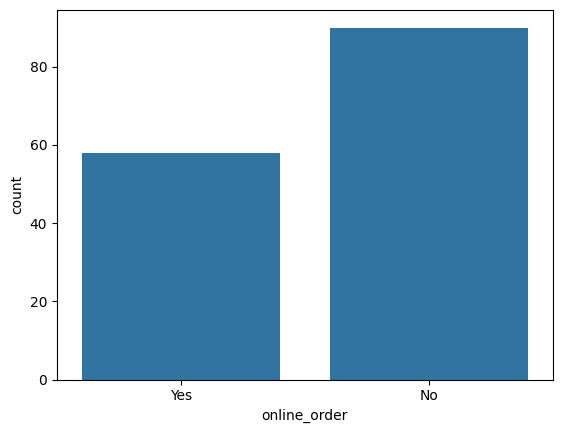

In [22]:
#lets explore online order column

sns.countplot(x=df['online_order'])

#graph tells that majority of the restaurants do not accept online orders.

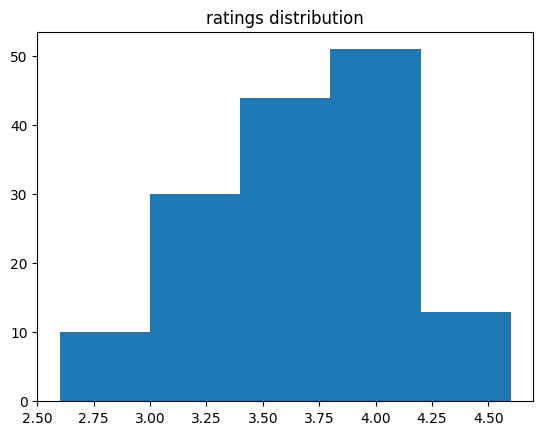

In [17]:
#lets explore rate column
plt.hist(df['rate'],bins=5)
plt.title('ratings distribution')

plt.show()

#The majority of restaurants received ratings ranging from 3.5 to 4.


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

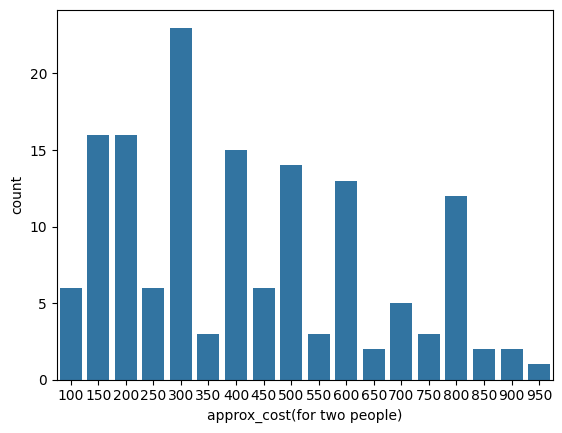

In [23]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)

#The majority of couples prefer restaurants with an approximate cost of 300 rupees.

<Axes: xlabel='online_order', ylabel='rate'>

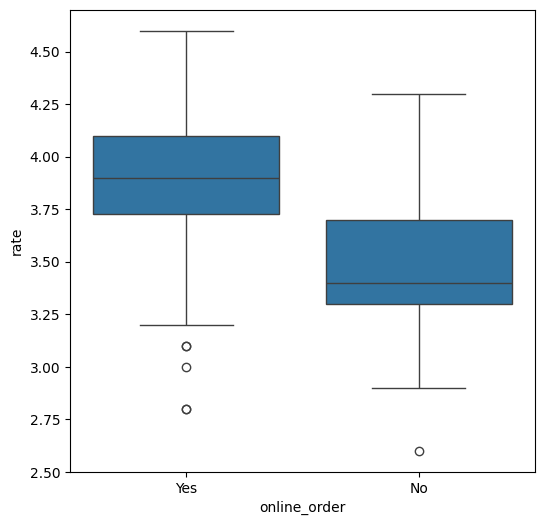

In [18]:
#examine whether online orders recieve higher ratings than offline orders
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=df)
#Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.

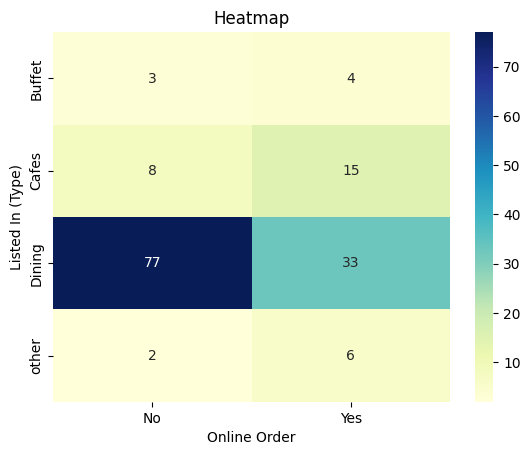

In [20]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

#CONCLUSION :Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.